In [90]:
import pandas as pd

NBA = pd.read_csv("Data/NBA_tot.txt", sep=",", header = 0)




In [91]:
print(NBA.columns.values)

['Rk' 'Player' 'Pos' 'Age' 'Tm' 'G' 'GS' 'MP' 'FG' 'FGA' 'FG%' '3P' '3PA'
 '3P%' '2P' '2PA' '2P%' 'eFG%' 'FT' 'FTA' 'FT%' 'ORB' 'DRB' 'TRB' 'AST'
 'STL' 'BLK' 'TOV' 'PF' 'PTS']


In [92]:
NBA.drop(columns =["Rk", "Age", "Tm", "GS"], inplace=True)

Text(0, 0.5, 'Position')

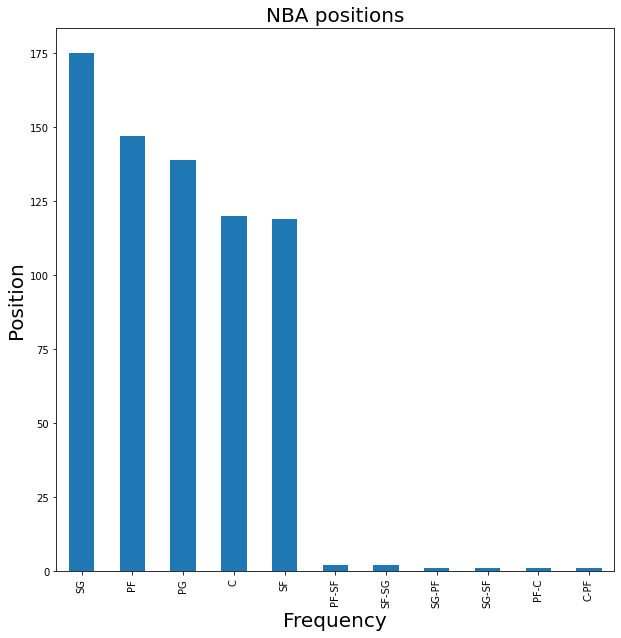

In [93]:
import matplotlib.pyplot as plt


pos = NBA.Pos.value_counts()
plt.subplots(figsize=(10, 10))
pos.plot(kind="bar")
plt.title("NBA positions", fontsize=20 )
plt.xlabel("Frequency", fontsize =20)
plt.ylabel("Position", fontsize=20 )

In [94]:
NBA[NBA.Pos.isin(["PF-SF", "SF-SG","SG-PF","SG-SF", "PF-C", "C-PF"])]

,Player,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
38,Harrison Barnes\barneha02,PF-SF,77,2533,431,1027,0.420,174,441,0.395,...,0.824,57,304,361,115,50,13,98,122,1265
102,Jimmy Butler\butleji01,SF-SG,65,2185,418,904,0.462,67,193,0.347,...,0.855,121,221,342,263,123,39,95,111,1215
128,Wilson Chandler\chandwi01,PF-SF,51,1177,114,273,0.418,59,158,0.373,...,0.720,48,167,215,82,25,21,46,123,305
378,Kyle Korver\korveky01,SG-PF,70,1334,201,483,0.416,138,348,0.397,...,0.822,9,153,162,81,25,12,59,106,600
426,Thon Maker\makerth01,C-PF,64,972,109,268,0.407,49,153,0.320,...,0.667,41,161,202,45,21,51,33,105,323
436,Wesley Matthews\matthwe02,SF-SG,69,2091,279,698,0.400,150,403,0.372,...,0.810,32,138,170,160,54,17,91,160,840
600,Jonathon Simmons\simmojo02,SG-SF,56,1064,133,350,0.380,28,104,0.269,...,0.742,27,99,126,128,29,15,68,89,366
611,Jason Smith\smithja02,PF-C,20,190,21,59,0.356,9,26,0.346,...,0.875,16,36,52,14,3,7,13,30,65


In [95]:
NBA["Pos"]= NBA["Pos"].apply(lambda x: x.split("-")[0] if "-" in x else x)

Text(0, 0.5, 'Position')

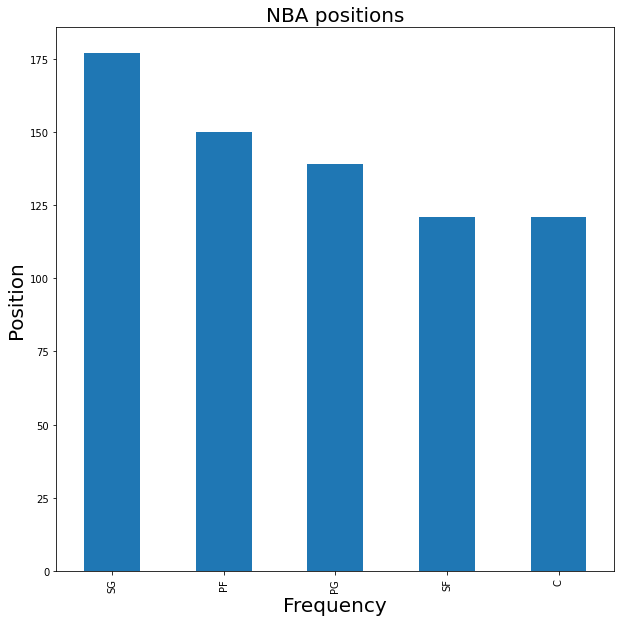

In [96]:
pos = NBA.Pos.value_counts()
plt.subplots(figsize=(10, 10))
pos.plot(kind="bar")
plt.title("NBA positions", fontsize=20 )
plt.xlabel("Frequency", fontsize =20)
plt.ylabel("Position", fontsize=20 )

In [97]:
duplicated_players = list(NBA[NBA.Player.duplicated(keep=False)].Player.unique())
print(len(duplicated_players))

86


In [99]:
print(NBA.columns.values)

['Player' 'Pos' 'G' 'MP' 'FG' 'FGA' 'FG%' '3P' '3PA' '3P%' '2P' '2PA'
 '2P%' 'eFG%' 'FT' 'FTA' 'FT%' 'ORB' 'DRB' 'TRB' 'AST' 'STL' 'BLK' 'TOV'
 'PF' 'PTS']


In [100]:
NBA.drop(columns = ["3P%", "2P%", "FT%", "eFG%", "FG%"], inplace = True)



In [109]:
not_sum = ["Player", "Pos"]
agg_fun = {x: "sum" for x in [y for y in list(NBA.columns.values) if y not in not_sum]}.rest_index=True
agg_fun["Pos"] = "first"


NBA.groupby(["Player"]).agg(agg_fun)

,G,MP,FG,FGA,FG%,3P,3PA,2P,2PA,FT,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Pos
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Gordon\gordoaa01,78,2633,470,1046,0.449,121,347,349,699,185,...,129,445,574,289,57,56,162,172,1246,PF
Aaron Holiday\holidaa01,50,646,105,262,0.401,43,127,62,135,41,...,5,62,67,87,21,13,40,71,294,PG
Abdel Nader\naderab01,61,694,91,215,0.423,32,100,59,115,27,...,14,102,116,20,20,12,26,68,241,SF
Al Horford\horfoal01,68,1973,387,723,0.535,73,203,314,520,78,...,120,338,458,283,59,86,102,126,925,C
Al-Farouq Aminu\aminual01,81,2292,257,593,0.433,96,280,161,313,150,...,112,498,610,104,68,33,72,143,760,PF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zaza Pachulia\pachuza01,68,878,85,193,0.440,0,4,85,189,97,...,99,166,265,91,31,17,57,151,267,C
Zhaire Smith\smithzh01,6,111,14,34,0.412,6,16,8,18,6,...,3,10,13,10,2,2,6,8,40,SG
Zhou Qi\qizh01,1,1,1,1,1.000,0,0,1,1,0,...,0,0,0,0,0,0,0,0,2,PF


# Random Forest Classifier

The random forest classifier algorithm creates many trees instead of just one to understand the dataset. This means that it is an ensemble method such that the final prediction of the random forest are made by averaging the predictions of each individual tree and thus follows the logic of the performance of the crowd is better than the performance of the individual. These individual trees are also based on randomly selected subsets of the data as well rather than the whole dataset.

This does so by taking advantage of:

1. Random Sampling of training datapoints when building trees
- Each tree lerns from a random sample of the data points. These random smaples are drawn without replacement, known as bootstrapping
- The idea if that by training each tree on different samples, although each tree might have high variance with resepct to a particular set of the training data, overall the entire forest will have lower variance, but not at the cost of increasing bias
- When testing, predictions are made by avcearging the predictions of each decision tree
2. Random subsets of features considered when splitting nodes
-  only a subset of all the features are considered for splitting each node in each decision tree

This requires you to specify `n_estimators` which specifies how many trees should be considered in the construction of the whole forest. The more trees chosen, the longer this will take

The benefit of this is that it injects some randomness into the fitting of trees to reduce overfitting that can be seen as part of decision trees, and hence produces and overall better model.

The first thing we want to do is to import the RandomForestClassifier algorithm, which is taken from the sklearn.ensemble module as seen below. We can then assign that Random Forest Classifier to a variable which we can latter call to apply to the data.


In [ ]:
#import the classifier
from sklearn.ensemble import RandomForestClassifier

#attach the classifier to a variable
clf = RandomForestClassifier(n_estimators =100, oob_Score=True, max_depth =3)


While this may be simply applied to our data using `.fit(x,y)` we can influence how it perfroms by using some of its parameters, similar to how we used `max_depth` in the Decision Tree Classifier workshop. 

The potential parameters include:
`n_estimators,
criterion,
max_features,
max_depth,
min_samples_split,
min_samples_leaf,
min_weight_leaf,
min_weight_fraction_leaf,
max_leaf_nodes,
min_impurity_decrease,
bootstrap,
oob_score,
n_jobs,
random_state,
verbose,
warm_start,
class_weight`

But for our purpose we will focuse on `n_estimators` and `max_depth`. `n_estimators` is the number of trees that you want to generate, which in this case we will generate 100 decision trees, and `max_depth` which as in the previous workshop, will limit the potential of overfitting of each individual tree, allow us to visualise the results and reduce computational complexity. More information on each parameter can be found [here](https://medium.com/@taplapinger/tuning-a-random-forest-classifier-1b252d1dde92) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

For our purposes we can stick with the default criterion for spliting as <b>gini</b> for gini impurity, but this can also be changed to 'entropy' if you wanted to see how the model performs. 


In [ ]:
clf = RandomForestClassifier(n_estimators =100, oob_Score=True, max_depth =3)


clf.fit(#train, test)
test_pred_random_forest = clf.predict(test_a)
    
print()

Different metrics can be used to see how a Random Forest Classifier performs, with these being the same as for the Decision Tree classifier. Instead of going through them all individually again, we can print out the entire metric as one. For information on each of these please see [here](https://towardsdatascience.com/introduction-to-decision-tree-classifiers-from-scikit-learn-32cd5d23f4d) 

In [ ]:
print (metrics.classification_report(test_lab, test_pred_random_forest))

We can compare this to a DummyClassifier which uses simple rules in order to make predictions. This can be used as a simple baseline to compare with real classifiers. (here)[https://towardsdatascience.com/build-your-first-random-forest-classifier-cbc63a956158]

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
dc = DummyClassifier(strategy='most_frequent')
dc.fit(X,y) 
dc_preds = dc.predict(X)
print (metrics.classification_report(test_lab, dc_preds))

What is good about the Random Forest Classifier, as compared to a single Decision Tree is that we can examine the feature importance more closely. This is because when creating an individual Decision Tree then the algorithm may focus quite heavily on one part of the data than another in that particular instance and thus this would have high importance. However, when running multiple decision trees we can more clearly identify which features are more important. 

From this understanding, we can remove features that are not important and re-run the models again or just use this information to understand which features are important for our model. 

In [ ]:
#print(clf.feature_importances_)
fi = pd.DataFrame({'feature': list(attributes.columns),
                  'importance': clf.feature_importances_}).\
                    sort_values('importance', ascending=True)

plot = fi.plot.barh(x = 'feature', y = 'importance')

fig = plot.get_figure()
fig.savefig("Plots/feature_importance_rf.png", bbox_inches='tight')

We can remove certain columns based on whether they pass a threshold of importance, for example in the case of 10 different features we could use a threshold of anything less than 1% is seen as not important. However we could also compare this to a random set of data, such that if the feature performans worse than the randomly generated data it can be removed.

In [ ]:
#print(clf.feature_importances_)
fi = pd.DataFrame({'feature': list(attributes.columns),
                  'importance': clf.feature_importances_}).\
                    sort_values('importance', ascending=True)

plot = fi.plot.barh(x = 'feature', y = 'importance')

fig = plot.get_figure()
fig.savefig("Plots/feature_importance_rf.png", bbox_inches='tight')

## Permutation importance

# Tune the hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'max_depth': [2,3,4], 
                     'min_samples_split': [1,2,3,4,5]}]

scores = ['recall']

for score in scores:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    clf = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters,
        scoring = f'{score}_macro'
    )
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")